In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from PIL import Image
import tensorflow as tf
import tensorboard
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.utils import to_categorical
import ssl
from tensorflow.keras import layers
ssl._create_default_https_context = ssl._create_unverified_context
import datetime
from tensorflow.keras.callbacks import TensorBoard
import os

Loading the MNIST data from keras datasets

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
X_test.shape

(10000, 28, 28)

Training data = 60000 images and Testing data = 10000 images
Image Dimesions ---> 28x28 pixels
Image is a grayscale Image

2


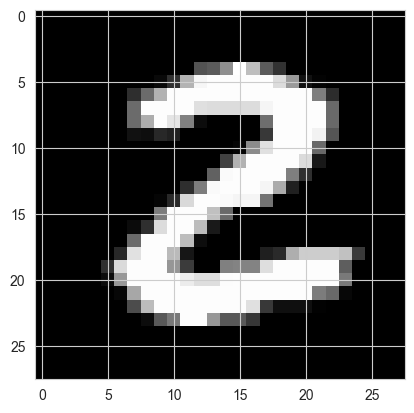

In [20]:
plt.imshow(X_train[25],cmap='gray')
print(y_train[25])

In [21]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can apply One Hot Encoding

All the Images have the same dimensions in this dataset, If not we have to resize all the images to a common dimension

In [22]:
#Scaling the values
X_train = X_train / 255
X_test = X_test / 255

Building the Neural Network

In [58]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [77]:
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [78]:
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [79]:
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [80]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [82]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7922 - loss: 0.6552 - val_accuracy: 0.9807 - val_loss: 0.0631
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9660 - loss: 0.1197 - val_accuracy: 0.9862 - val_loss: 0.0474
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9755 - loss: 0.0823 - val_accuracy: 0.9880 - val_loss: 0.0418
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9812 - loss: 0.0641 - val_accuracy: 0.9892 - val_loss: 0.0373
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9826 - loss: 0.0533 - val_accuracy: 0.9887 - val_loss: 0.0388
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.9888 - val_loss: 0.0365
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9892 - val_loss: 0.0371
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accu

In [83]:
# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0299
Test Accuracy: 99.34%


In [85]:
%load_ext tensorboard

In [87]:

%tensorboard --logdir logs/fit

Launching TensorBoard...